In [356]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
video_game = pd.read_csv("top100videogamesales.csv")
import numpy as np

QUESTION 01: Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

In [357]:
video_game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


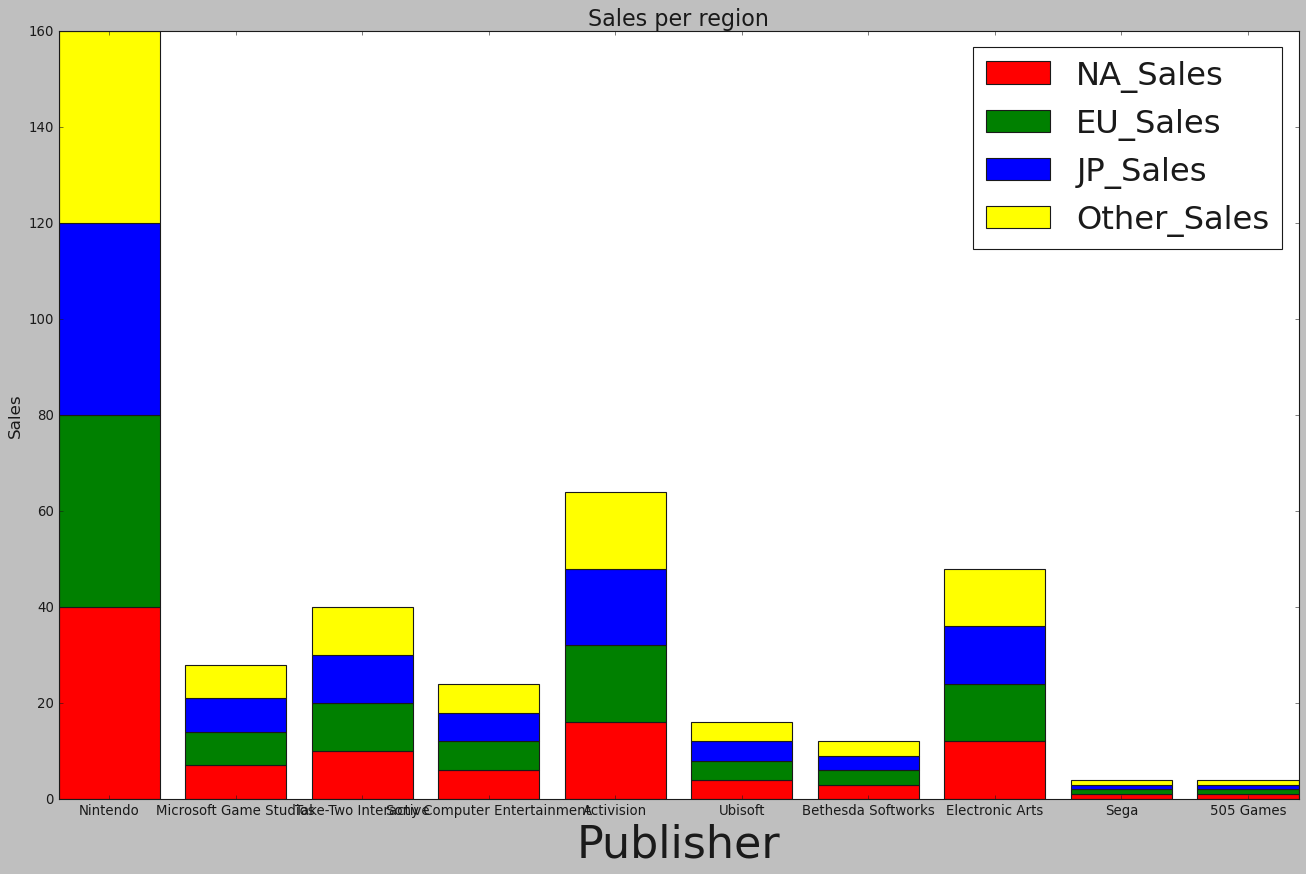

In [358]:
Publishers = np.array(video_game['Publisher'].unique())
Publishers

Nintendo = video_game[video_game['Publisher']=='Nintendo']
len(Nintendo['NA_Sales'])
# I could create a dictionary using lists as values so I have all the information I need to put in the chart.
NA_Sales = []
EU_Sales = []
JP_Sales = []
Other_Sales = []
for p in Publishers:
    ps = video_game[video_game['Publisher'] == p]
    NA_Sales.append(len(ps['NA_Sales']))
    EU_Sales.append(len(ps['NA_Sales']))
    JP_Sales.append(len(ps['NA_Sales']))
    Other_Sales.append(len(ps['NA_Sales']))
labels = []
for p in Publishers:
    labels.append(p)

NA_Sales = np.array(NA_Sales)
EU_Sales = np.array(EU_Sales)
JP_Sales = np.array(JP_Sales)
Other_Sales = np.array(Other_Sales)
labels = np.array(labels)

fig = plt.figure(figsize=(21,13))

plt.bar(labels, NA_Sales, color='red')
plt.bar(labels, EU_Sales, bottom=NA_Sales, color='green')
plt.bar(labels, JP_Sales, bottom=NA_Sales+EU_Sales, color='blue')
plt.bar(labels, Other_Sales, bottom=NA_Sales+EU_Sales+JP_Sales, color='yellow')

fig.set_size_inches(20,12)

plt.xlabel('Publisher', loc='center', fontsize=40)
plt.ylabel('Sales', fontsize=15)
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], fontsize=29)
plt.title("Sales per region", fontsize=20)


plt.show()

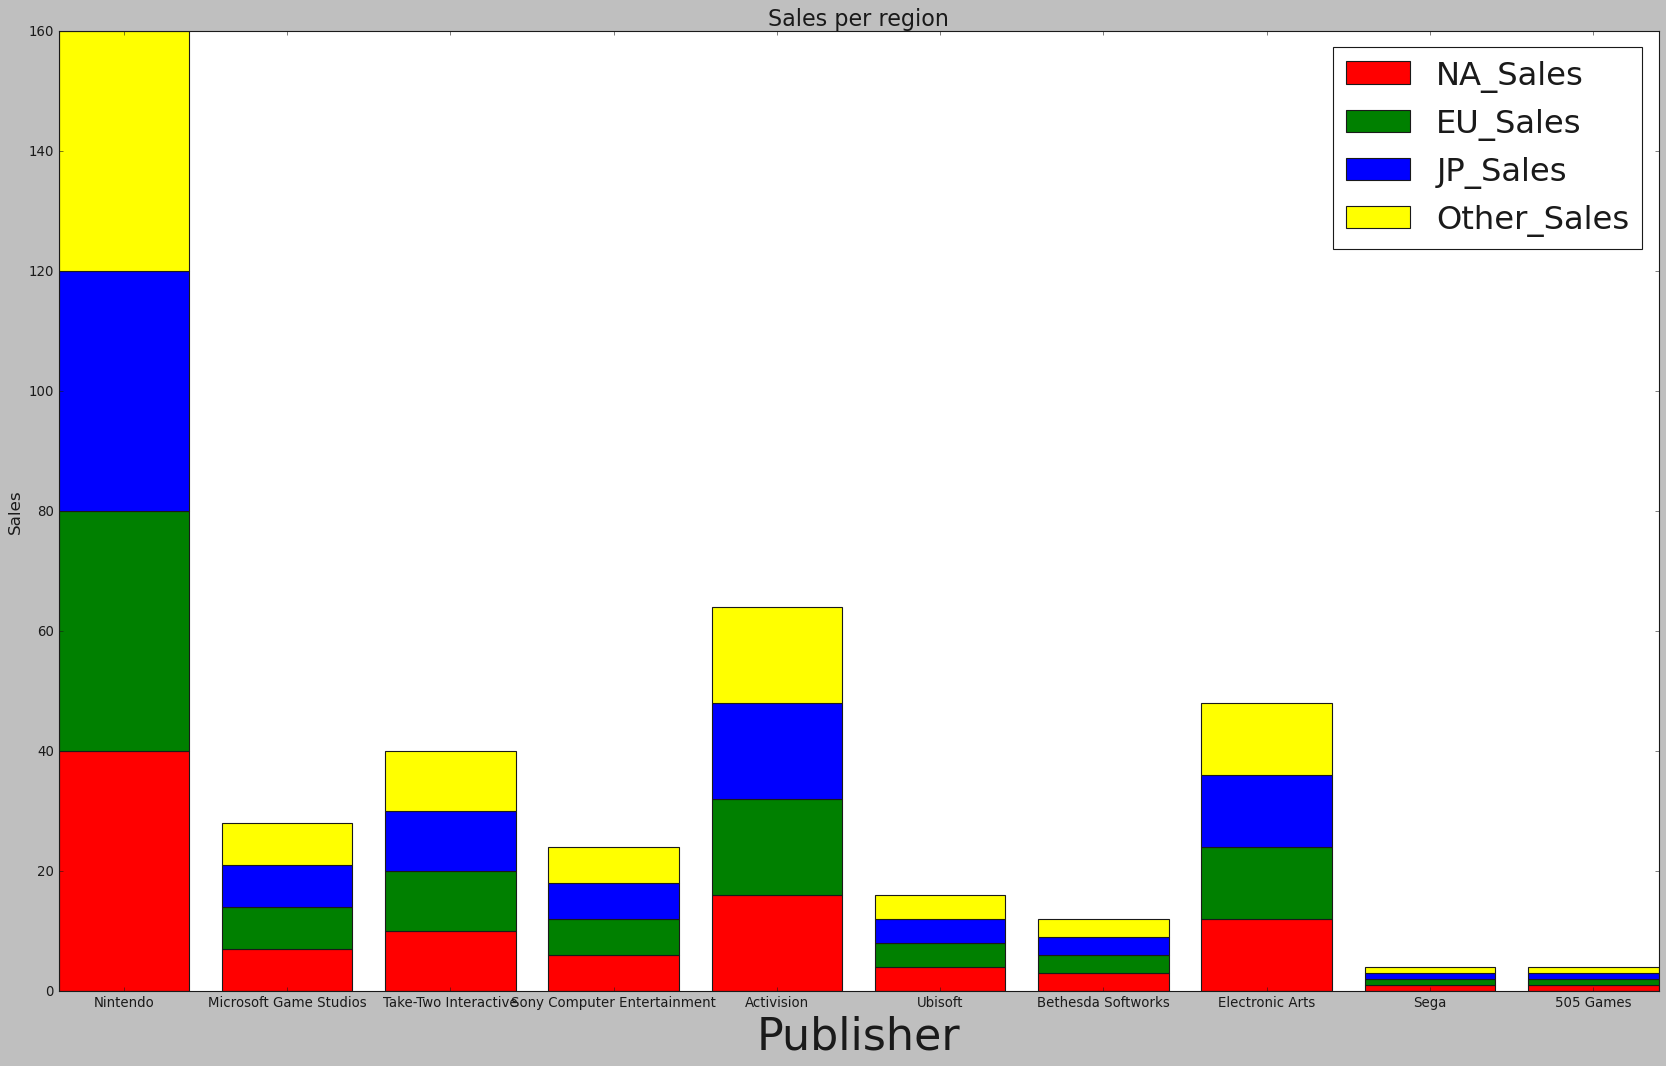

In [368]:
Publishers = np.array(video_game['Publisher'].unique())
Publishers

Nintendo = video_game[video_game['Publisher']=='Nintendo']
len(Nintendo['NA_Sales'])
# I could create a dictionary using lists as values so I have all the information I need to put in the chart.
NA_Sales = []
EU_Sales = []
JP_Sales = []
Other_Sales = []
for p in Publishers:
    ps = video_game[video_game['Publisher'] == p]
    NA_Sales.append(len(ps['NA_Sales']))
    EU_Sales.append(len(ps['NA_Sales']))
    JP_Sales.append(len(ps['NA_Sales']))
    Other_Sales.append(len(ps['NA_Sales']))
labels = []
for p in Publishers:
    labels.append(p)

NA_Sales = np.array(NA_Sales)
EU_Sales = np.array(EU_Sales)
JP_Sales = np.array(JP_Sales)
Other_Sales = np.array(Other_Sales)
labels = np.array(labels)

fig = plt.figure(figsize=(21,13))

ax = fig.add_axes([0.1, 0.1, 1, 1])

ax.bar(labels, NA_Sales, color='red')
ax.bar(labels, EU_Sales, bottom=NA_Sales, color='green')
ax.bar(labels, JP_Sales, bottom=NA_Sales+EU_Sales, color='blue')
ax.bar(labels, Other_Sales, bottom=NA_Sales+EU_Sales+JP_Sales, color='yellow')

fig.set_size_inches(20,12)

plt.xlabel('Publisher', loc='center', fontsize=40)
plt.ylabel('Sales', fontsize=15)
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], fontsize=29)
plt.title("Sales per region", fontsize=20)

plt.show()

Try to display it the chart into two different charts (divide the labels in 2 groups)

QUESTION 02: Global Sales by Year: Create a line chart to show the total global sales for each year.

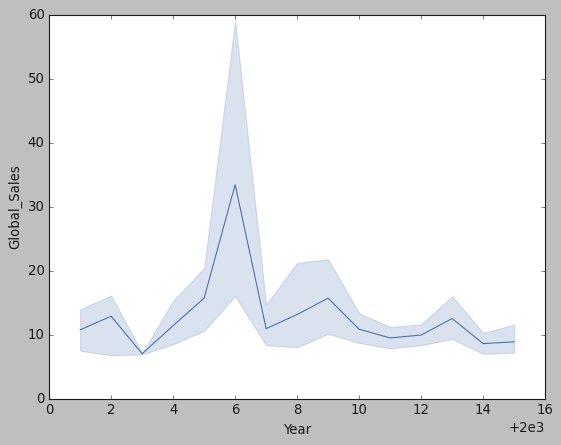

In [360]:
sns.lineplot(data=video_game, x='Year', y='Global_Sales')
plt.show()

QUESTION 03: Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre.

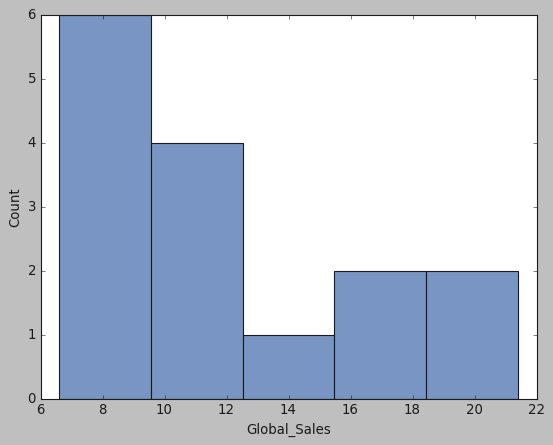

(None, 15)

In [375]:
Action = video_game[video_game['Genre'] == 'Action']
sns.histplot(data=Action, x='Global_Sales')
plt.show()

Global Sales of Action video games are concentrated in the cheaper ones (66%).

QUESTION 04: North American Sales by Genre: Create a pie chart to show the percentage of sales genre had in the North American market. (Group smaller "slices" together into an "other" category to create an easier to read chart). Detail what is included in the other category.

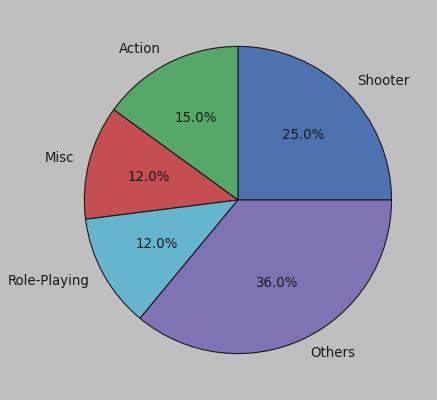

(None,
 array([0.1 , 0.1 , 0.08, 0.12, 0.04, 0.15, 0.12, 0.01, 0.25, 0.03]),
 array(['Sports', 'Racing', 'Platform', 'Misc', 'Simulation', 'Action',
        'Role-Playing', 'Puzzle', 'Shooter', 'Fighting'], dtype=object))

In [476]:
genres = np.array(video_game['Genre'].unique())
proportion = []
for g in genres:
    proportion.append(len(video_game[video_game['Genre']==g])/len(video_game))
propor = np.array(proportion)
gen = list(genres)
propor_copy = proportion

top_p = []
top_g = []


while len(top_p) < 4:
    for p in proportion:
        if p == max(proportion):
            top_p.append(p)
            top_g.append(gen[proportion.index(p)])
            gen.remove(gen[proportion.index(p)])
            proportion.remove(p)
        else:
            continue

# Create the Pie Chart with that information

rest = sum(np.array(propor_copy))
top_values = np.append(np.array(top_p), rest)
top_g.append('Others')
top_labels = np.array(top_g)
top_values, top_labels

plt.pie(top_values, labels=top_labels, autopct='%1.1f%%')
plt.show(), propor, genres

The 'Others' category represents the 36% of the total Genres. And is composed by the following categories:

    a) Sports 10%
    b) Racing 10%
    c) Platform 8%
    d) Simulation 4%
    e) Puzzle 1%
    f) Fighting 3%

QUESTION 05: European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller "slices" together into an "other" category to create an easier to read chart). Detail what is included in the other category. Explain the chart using markdown.

QUESTION 06: Explain differences and similarities between the North American and European charts in markdown.

QUESTION 07: Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.

EXTRA CREDIT --> QUESTION 01: Determine the appropriate charts to answer the following questions:

                    a) What genre of game is present the most in the top 100 games from 2000-2015?

                    b) What percentage of global sales does PlayStation have in the dataset?

                    c) What is the distribution of sales for Shooter games?